<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 1. Laboratorio: Árboles de decisión, reglas y ensemble learning</header1></left>

## Importación de librerias necesarias

In [1]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc


## Cargar el Dataset

In [2]:
#Código para cargar el Dataset
# Ruta del archivo en la carpeta de descargas
file_path = r'C:\Users\USUARIO\Downloads\Laboratorio_dataset_car.csv'

# Cargar el archivo CSV
data = pd.read_csv(file_path, sep=';')

# Mostrar las primeras filas del dataset para verificar la carga y separación correcta
print(data.head())


  Buying Maintenance Doors Person lug_boot safety  class
0  vhigh       vhigh     2      2    small    low  unacc
1  vhigh       vhigh     2      2    small    med  unacc
2  vhigh       vhigh     2      2    small   high  unacc
3  vhigh       vhigh     2      2      med    low  unacc
4  vhigh       vhigh     2      2      med    med  unacc


## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes:

Descripción del problema: El problema consiste en clasificar la aceptabilidad de un automóvil en función de diferentes características como el costo de compra, el mantenimiento, el número de puertas, la capacidad de pasajeros, el tamaño del maletero y el nivel de seguridad. Se trata de un problema de clasificación supervisada, ya que la variable objetivo (class) es categórica y se predice a partir de un conjunto de variables de entrada.

Variable objetivo: class (representa la aceptabilidad del automóvil: unacc, acc, good, vgood).

## Caracterización del Dataset

Se incluye una descripción de los datos con:

>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias en total.
>- Número de instancias pertenecientes a cada clase.
>- Número de atributos de entrada, su significado y tipo.
>- ¿Hay algún valor de atributo desconocido?

Se incorporá una descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [3]:
# Número de clases y su representación

print(data.describe(include='all'))

       Buying Maintenance Doors Person lug_boot safety  class
count    1750        1750  1750   1750     1750   1750   1750
unique      4           4     4      3        3      3      4
top     vhigh         low     2      4      big   high  unacc
freq      443         447   444    587      585    590   1215


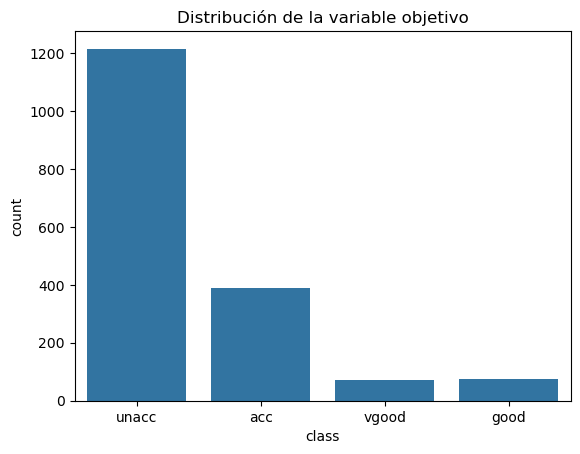

ValueError: No variables found for grid columns.

In [4]:
#Código que responde a la descripción anterior (incorpore las lineas de code necesarias. Describa cadas sentencia de código)

# Visualización de la distribución de la variable objetivo
sns.countplot(x='class', data=data)
plt.title('Distribución de la variable objetivo')
plt.show()

# Visualización de las variables de entrada
sns.pairplot(data, hue='class')
plt.show()

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [25]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding

# Aplicar One-Hot Encoding
data_encoded = pd.get_dummies(data, drop_first=True)

print("Dataset después de One-Hot Encoding:\n", data_encoded.head())


Dataset después de One-Hot Encoding:
    Buying_low  Buying_med  Buying_vhigh  Maintenance_low  Maintenance_med  \
0       False       False          True            False            False   
1       False       False          True            False            False   
2       False       False          True            False            False   
3       False       False          True            False            False   
4       False       False          True            False            False   

   Maintenance_vhigh  Doors_3  Doors_4  Doors_5more  Person_4  Person_more  \
0               True    False    False        False     False        False   
1               True    False    False        False     False        False   
2               True    False    False        False     False        False   
3               True    False    False        False     False        False   
4               True    False    False        False     False        False   

   lug_boot_med  lug_boot_smal

## División del dataset en datos de entrenamiento y datos de test 

In [26]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evluación planeada. Describa cuál es.
# División del dataset
X = data_encoded.drop('class_unacc', axis=1)
y = data_encoded['class_unacc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)



Tamaño del set de entrenamiento: (1225, 17)
Tamaño del set de prueba: (525, 17)


## Ajuste de los modelos de clasificación propuestos

Justifique la selección de las dos propuestas de modelación seleccionadas:

In [28]:
#Código de ajuste del modelo de clasificación 1
# Ajuste del modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [29]:
#Código de ajuste del modelo de clasificación 2
# Ajuste del modelo de Bosque Aleatorio
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Evaluación de cada modelo

Al menos incluya:

+ Instancias clasificadas correctamente
+ Instancias clasificadas incorrectamente
+ TP Rate
+ FP Rate
+ Matriz de confusión


In [30]:
#Código para mostrar la evaluación del modelo de clasificación 1
# Predicciones y evaluación del Árbol de Decisión
dt_predictions = dt_model.predict(X_test)

print("Evaluación Árbol de Decisión:")
print(confusion_matrix(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))
print("Exactitud:", accuracy_score(y_test, dt_predictions))


Evaluación Árbol de Decisión:
[[151  19]
 [  8 347]]
              precision    recall  f1-score   support

       False       0.95      0.89      0.92       170
        True       0.95      0.98      0.96       355

    accuracy                           0.95       525
   macro avg       0.95      0.93      0.94       525
weighted avg       0.95      0.95      0.95       525

Exactitud: 0.9485714285714286


Construya un párrafo con los principales hallazgos.

In [31]:
#Código  para mostrarla evaluación del modelo de clasificación 2
# Predicciones y evaluación del Bosque Aleatorio
rf_predictions = rf_model.predict(X_test)

print("Evaluación Bosque Aleatorio:")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print("Exactitud:", accuracy_score(y_test, rf_predictions))


Evaluación Bosque Aleatorio:
[[154  16]
 [ 13 342]]
              precision    recall  f1-score   support

       False       0.92      0.91      0.91       170
        True       0.96      0.96      0.96       355

    accuracy                           0.94       525
   macro avg       0.94      0.93      0.94       525
weighted avg       0.94      0.94      0.94       525

Exactitud: 0.9447619047619048


Construya un párrafo con los principales hallazgos.

## Comparación del desempeño de modelos

In [34]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla
# Comparación de exactitudes
model_comparison = pd.DataFrame({
    "Modelo": ["Árbol de Decisión", "Bosque Aleatorio"],
    "Exactitud": [accuracy_score(y_test, dt_predictions), accuracy_score(y_test, rf_predictions)]
})

print("Comparación de desempeño de los modelos:")
print(model_comparison)




Comparación de desempeño de los modelos:
              Modelo  Exactitud
0  Árbol de Decisión   0.948571
1   Bosque Aleatorio   0.944762


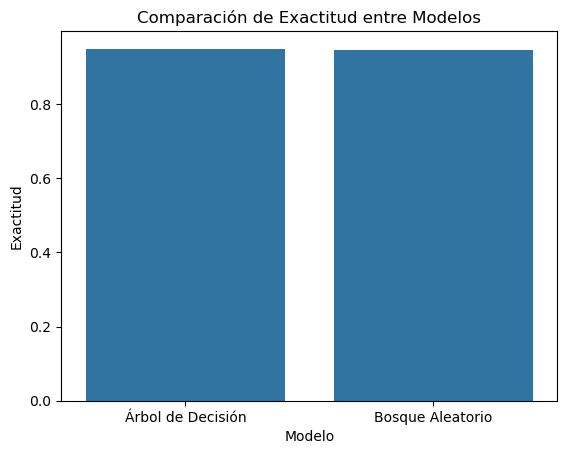

In [36]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica
# Visualización de la comparación
sns.barplot(x="Modelo", y="Exactitud", data=model_comparison)
plt.title("Comparación de Exactitud entre Modelos")
plt.show()


Construya un párrafo con los principales hallazgos.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo: ventajas y desventajas de cada modelo propuesto, Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas. Recomendaciones de mejora de las propuestas: 